In [39]:
import geojson
import geopandas as gpd
import descarteslabs as dl
import pandas as pd
from shapely import geometry
import numpy as np
import json
import yaml

- Combine airbus and cv polygons
- get S2-shaped tiles for all polygons
- filter those tiles for only those within airbus tiles

In [45]:
cv_tiles = gpd.read_file('../data/cv_all_tiles.geojson')
cv_polys = gpd.read_file('../data/cv_all_polys.geojson')

In [46]:
cv_mp =geometry.MultiPolygon([geom for geom in cv_tiles.unary_union.geoms])

In [42]:
config = yaml.safe_load(open('../cloud_products_exec.yaml','r'))

In [43]:
vector_keys = [kk for kk in config.keys() if kk.split('-')[1][0]=='V']

In [47]:
vector_keys=vector_keys[1:]

In [48]:
vector_keys

['S2-V1-Primary',
 'S2-V2-Secondary',
 'S2-V3-Deepstack',
 'S2-V4-Final',
 'SPOT-V1-Vectorised',
 'SPOT-V2-Filtered']

In [49]:
for kk in vector_keys:
    fc = dl.vectors.FeatureCollection(config[kk]['cloud_id'])
    fts = [geojson.Feature(geometry=f.geometry, properties=f.properties) for f in fc.filter(mp).features()]
    print (kk, len(fts))
    json.dump(geojson.FeatureCollection(fts),open('../data/crossvalidation/'+kk+'.geojson','w'))

S2-V1-Primary 746
S2-V2-Secondary 894
S2-V3-Deepstack 555
S2-V4-Final 420
SPOT-V1-Vectorised 699
SPOT-V2-Filtered 324


In [53]:
gdfs = {}
for kk in vector_keys:
    gdfs[kk] = gpd.read_file('../data/crossvalidation/'+kk+'.geojson')

In [55]:
for kk in vector_keys:
    gdfs[kk]['geoarea'] = gdfs[kk].to_crs({'init': 'epsg:3857'}).area

/home/lucas/miniconda3/envs/geoml/lib/python3.7/site-packages/pyproj/crs/crs.py:55: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/home/lucas/miniconda3/envs/geoml/lib/python3.7/site-packages/pyproj/crs/crs.py:55: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/home/lucas/miniconda3/envs/geoml/lib/python3.7/site-packages/pyproj/crs/crs.py:55: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization metho

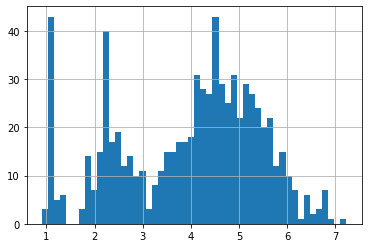

In [62]:
np.log10(gdfs['S2-V1-Primary']['geoarea']).hist(bins=50)

In [56]:
res_dict= {}
for kk in vector_keys:
    res_dict[kk] = {}
    np.hist()

,dltile,primary_id,sentinel-2:L1C:2018-10-19_52SGA_99_S2A_v1:M,sentinel-2:L1C:2018-10-19_52SGA_99_S2A_v1:P,sentinel-2:L1C:2018-10-24_52SGA_99_S2B_v1:M,sentinel-2:L1C:2018-10-24_52SGA_99_S2B_v1:P,sentinel-2:L1C:2018-10-29_52SGA_99_S2A_v1:M,sentinel-2:L1C:2018-10-29_52SGA_99_S2A_v1:P,sentinel-2:L1C:2018-11-08_52SGA_99_S2A_v1:M,sentinel-2:L1C:2018-11-08_52SGA_99_S2A_v1:P,...,sentinel-2:L1C:2018-10-03_31TCJ_99_S2B_v1,sentinel-2:L1C:2018-10-06_31TCJ_00_S2B_v1,sentinel-2:L1C:2018-10-13_31TCJ_99_S2B_v1,sentinel-2:L1C:2018-10-23_31TCJ_99_S2B_v1,sentinel-2:L1C:2018-11-12_31TCJ_99_S2B_v1,sentinel-2:L1C:2018-11-15_31TCJ_00_S2B_v1,sentinel-2:L1C:2018-11-17_31TCJ_99_S2A_v1,sentinel-2:L1C:2018-11-25_31TCJ_00_S2B_v1,geometry,geoarea
0,2000:0:10.0:52:11:177,2000:0:10.0:52:11:177_44,0.367016,1.0,0.303534,1.0,0.218677,1.0,0.344211,1.0,...,None,None,None,None,None,None,None,None,"POLYGON ((131.52004 32.11008, 131.51994 32.110...",1.718096e+04
1,2000:0:10.0:44:-13:137,2000:0:10.0:44:-13:137_18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,None,None,None,None,None,None,None,"POLYGON ((78.44307 24.76692, 78.44248 24.76691...",4.702747e+05
2,2000:0:10.0:54:9:245,2000:0:10.0:54:9:245_22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,None,None,None,None,None,None,None,"POLYGON ((143.38337 44.31865, 143.38324 44.318...",4.313263e+04
3,2000:0:10.0:53:7:191,2000:0:10.0:53:7:191_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,None,None,None,None,None,None,None,"POLYGON ((136.53130 34.66877, 136.53075 34.668...",1.569408e+04
4,2000:0:10.0:42:4:119,2000:0:10.0:42:4:119_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,None,None,None,None,None,None,None,"POLYGON ((69.84556 21.59121, 69.84518 21.59121...",1.190381e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,2000:0:10.0:31:-10:244,2000:0:10.0:31:-10:244_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,None,None,None,None,None,None,None,"POLYGON ((0.57047 44.18209, 0.57010 44.18208, ...",4.798424e+03
742,2000:0:10.0:42:11:132,2000:0:10.0:42:11:132_591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,None,None,None,None,None,None,None,"POLYGON ((71.20026 23.90164, 71.20018 23.90157...",1.543239e+02
743,2000:0:10.0:54:-7:194,2000:0:10.0:54:-7:194_18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,None,None,None,None,None,None,None,"POLYGON ((139.61492 35.15281, 139.61489 35.152...",1.201132e+01
744,2000:0:10.0:52:5:176,2000:0:10.0:52:5:176_16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,None,None,None,None,None,None,None,"POLYGON ((130.20788 31.85769, 130.20724 31.857...",4.479463e+04
